## Introduction to NLP (Natural Language Processing)
<br>
© mgr inż. Soveatin Kuntur / Winter School - Data Literacy
<br>
Warsaw, 06.02 - 10.02.2023

© Anna Wróblewska, improvements and adding more metrics, and classifiers


As we know from lecture, general pipeline of NLP is as follows:
<br>
1. Data Preprocessing
<br>
2. Data Processing
<br>
3. Output

## Data Processing

Now we come to second part of our experiment which is data processing. This task will be classification problem. Which means, we will ask our model to classify the sentiment. It is worth to mention that, you can use your clean dataset to do this part. <br>

As for example reason, teacher will show how to use sklearn packages on this part.

## Dataset Description
The sample dataset from NLTK is separated into positive and negative tweets. It contains 5000 positive tweets and 5000 negative tweets exactly. The exact match between these classes is not a coincidence. The intention is to have a balanced dataset. That does not reflect the real distributions of positive and negative classes in live Twitter streams. It is just because balanced datasets simplify the design of most computational methods that are required for sentiment analysis. However, it is better to be aware that this balance of classes is artificial.

You can download the dataset in your workspace (or in your local computer) by doing
<br>
nltk.download('twitter_samples')


In [2]:
!pip install nltk

     ---------------------------------------- 0.0/41.5 kB ? eta -:--:--
     --------- ------------------------------ 10.2/41.5 kB ? eta -:--:--
     ---------------------------- --------- 30.7/41.5 kB 262.6 kB/s eta 0:00:01
     -------------------------------------- 41.5/41.5 kB 333.1 kB/s eta 0:00:00
   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   - -------------------------------------- 0.0/1.5 MB 991.0 kB/s eta 0:00:02
   ------ --------------------------------- 0.3/1.5 MB 3.2 MB/s eta 0:00:01
   -------------- ------------------------- 0.5/1.5 MB 4.2 MB/s eta 0:00:01
   ------------------------ --------------- 0.9/1.5 MB 5.4 MB/s eta 0:00:01
   ----------------------------------- ---- 1.3/1.5 MB 5.7 MB/s eta 0:00:01
   ---------------------------------------- 1.5/1.5 MB 5.6 MB/s eta 0:00:00
   ---------------------------------------- 0.0/274.1 kB ? eta -:--:--
   ---------------------------------------- 274.1/274.1 kB 8.5 MB/s eta 0:00:00


In [4]:
!pip install wordcloud

   ---------------------------------------- 0.0/300.7 kB ? eta -:--:--
   - -------------------------------------- 10.2/300.7 kB ? eta -:--:--
   --- ----------------------------------- 30.7/300.7 kB 435.7 kB/s eta 0:00:01
   ------------------------ --------------- 184.3/300.7 kB 1.4 MB/s eta 0:00:01
   ------------------------ --------------- 184.3/300.7 kB 1.4 MB/s eta 0:00:01
   ---------------------------------------- 300.7/300.7 kB 1.3 MB/s eta 0:00:00


In [5]:
import nltk                                # Python library for NLP
from nltk.corpus import twitter_samples    # sample Twitter dataset from NLTK
from nltk.corpus import stopwords
import matplotlib.pyplot as plt            # library for visualization
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.model_selection import train_test_split # function for splitting data to train and test sets
from nltk.classify import SklearnClassifier
from wordcloud import WordCloud,STOPWORDS

We can load the text fields of the positive and negative tweets by using the module's `strings()` method like this:

In [6]:
# downloads sample twitter dataset.
nltk.download('twitter_samples')

[nltk_data] Downloading package twitter_samples to
[nltk_data]     C:\Users\barto\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\twitter_samples.zip.


True

In [7]:
# select the set of positive and negative tweets
all_positive_tweets = twitter_samples.strings('positive_tweets.json')
all_negative_tweets = twitter_samples.strings('negative_tweets.json')

To make it easier, let us used pandas dataframe

In [8]:
# Create a dataframe from positive tweets
pos_tweet = pd.DataFrame(all_positive_tweets, columns=['Tweet'])
# Add a column to dataframe for positive sentiment value 1
pos_tweet['Sentiment'] = 1
# Create a temporary dataframe for negative tweets
neg_tweet = pd.DataFrame(all_negative_tweets, columns=['Tweet'])
# Add a column to temporary dataframe for negative sentiment value 0
neg_tweet['Sentiment'] = 0
# Combe positive and negative tweets in one single dataframe
#df = pos_tweet.append(neg_tweet, ignore_index=True)
df = pd.concat([neg_tweet, pos_tweet], ignore_index=True)

df = df.sample(frac = 1)
df.reset_index(drop=True, inplace=True)

In [9]:
df

,Tweet,Sentiment
0,@allygrrdo thankyou pretty! :),1
1,@Elemaaan oley be :D,1
2,@digestdigital things aren't looking too great...,1
3,@darrenwho_ why is naya there whats happening....,0
4,MY snapchat - LeanneRiner19 #snapchat #hornyki...,0
...,...,...
9995,i just realised i am a month clean and wow i t...,0
9996,Photoset: sadomasochistsparadise: Wynter botto...,1
9997,"@thei100 @Independent you said I was a man, I ...",0
9998,@Ripap70 Hi ;-) If you want a free guide use t...,1


Next, we'll print a report with the number of positive and negative tweets. It is also essential to know the data structure of the datasets

In [10]:
# Displaying shape of dataset
print('Dataset size:',df.shape)
df.groupby('Sentiment').count()

Dataset size: (10000, 2)


,Tweet
Sentiment,
0,5000
1,5000


In [11]:
# Splitting the dataset into train and test set
train, test = train_test_split(df,test_size = 0.1)
train

,Tweet,Sentiment
2590,"Twitter meni tebrik etdi :))\nCongratulations,...",1
9731,@Taylor_Marisa Follow back ? :),1
2586,when u r obsessed with OTH and watching the wh...,1
7181,"I read David's tweet thinking ""damn only one m...",1
6437,Offered promethazine or zopiclone for sleep in...,0
...,...,...
4633,@liyanalovette sorry :(,0
641,When you realise that 2/3 of your big summer p...,0
371,@PoemPorns hah....and a thousand more lies :D,1
1689,Haha X . What The :D https://t.co/Jo7vtQmvSR,1


In [12]:
test

,Tweet,Sentiment
76,@kewlaf I feel u :(,0
2521,@_irwinstagram I've been trying for so long fo...,0
5010,This manga is just too cute and yet made me cr...,0
2476,@LeagueOfKnockup Dang it! :( Pon thought the t...,0
6713,@YM_Dish98 doushite :( ?,0
...,...,...
829,@AaronCarpenter is it too late? :( #Followmeaaron,0
3081,"I want to watch a movie, listen to Sizwe, eat ...",0
3083,"@FraserNelson @Telegraph not a popular,or char...",1
6022,Where is carmen :((((((((((,0


Positive words


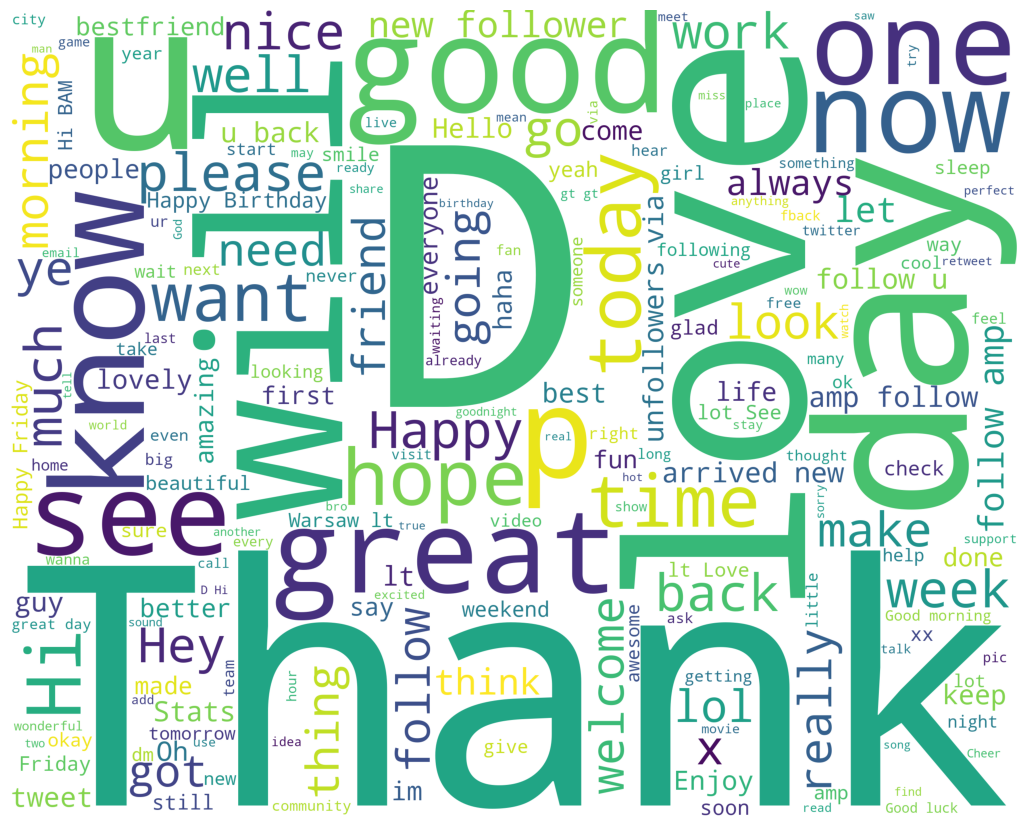

Negative words


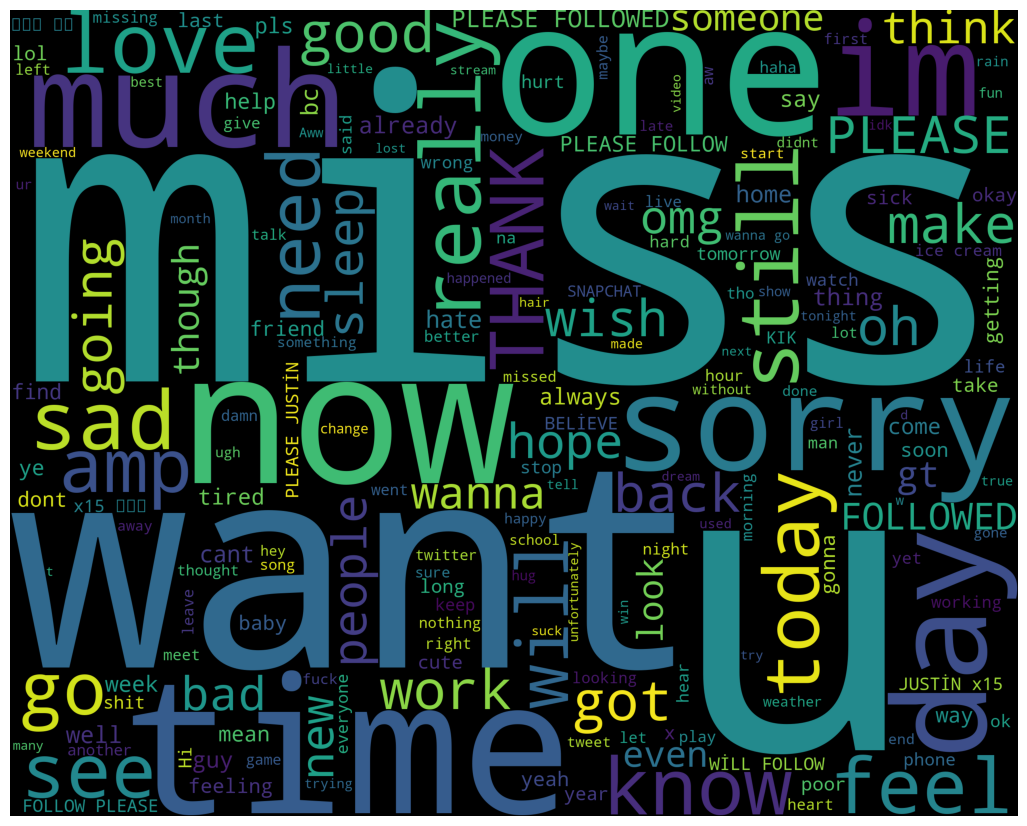

In [13]:
train_pos = train[ train['Sentiment'] == 1]
train_pos = train_pos['Tweet']
train_neg = train[ train['Sentiment'] == 0]
train_neg = train_neg['Tweet']

def wordcloud_draw(data, color = 'black'):
    words = ' '.join(data)
    cleaned_word = " ".join([word for word in words.split()
                            if 'http' not in word
                                and not word.startswith('@')
                                and not word.startswith('#')
                                and word != 'RT'
                            ])
    wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color=color,
                      width=2500,
                      height=2000
                     ).generate(cleaned_word)
    plt.figure(1,figsize=(13, 13))
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()

print("Positive words")
wordcloud_draw(train_pos,'white')
print("Negative words")
wordcloud_draw(train_neg)

In [14]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\barto\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [15]:

tweets = []
stopwords_set = set(stopwords.words("english"))

for index, row in train.iterrows():
    words_filtered = [e.lower() for e in row.Tweet.split() if len(e) >= 3]
    words_cleaned = [word for word in words_filtered
        if 'http' not in word
        and not word.startswith('@')
        and not word.startswith('#')
        and word != 'RT']
    words_without_stopwords = [word for word in words_cleaned if not word in stopwords_set]
    tweets.append((words_without_stopwords, row.Sentiment))

test_pos = test[ test['Sentiment'] == 1]
test_pos = test_pos['Tweet']
test_neg = test[ test['Sentiment'] == 0]
test_neg = test_neg['Tweet']

In [16]:
# Extracting word features
def get_words_in_tweets(tweets):
    all = []
    for (words, sentiment) in tweets:
        all.extend(words)
    return all

def get_word_features(wordlist):
    wordlist = nltk.FreqDist(wordlist)
    features = wordlist.keys()
    return features
w_features = get_word_features(get_words_in_tweets(tweets))

def extract_features(document):
    document_words = set(document)
    features = {}
    for word in w_features:
        features['contains(%s)' % word] = (word in document_words)
    return features

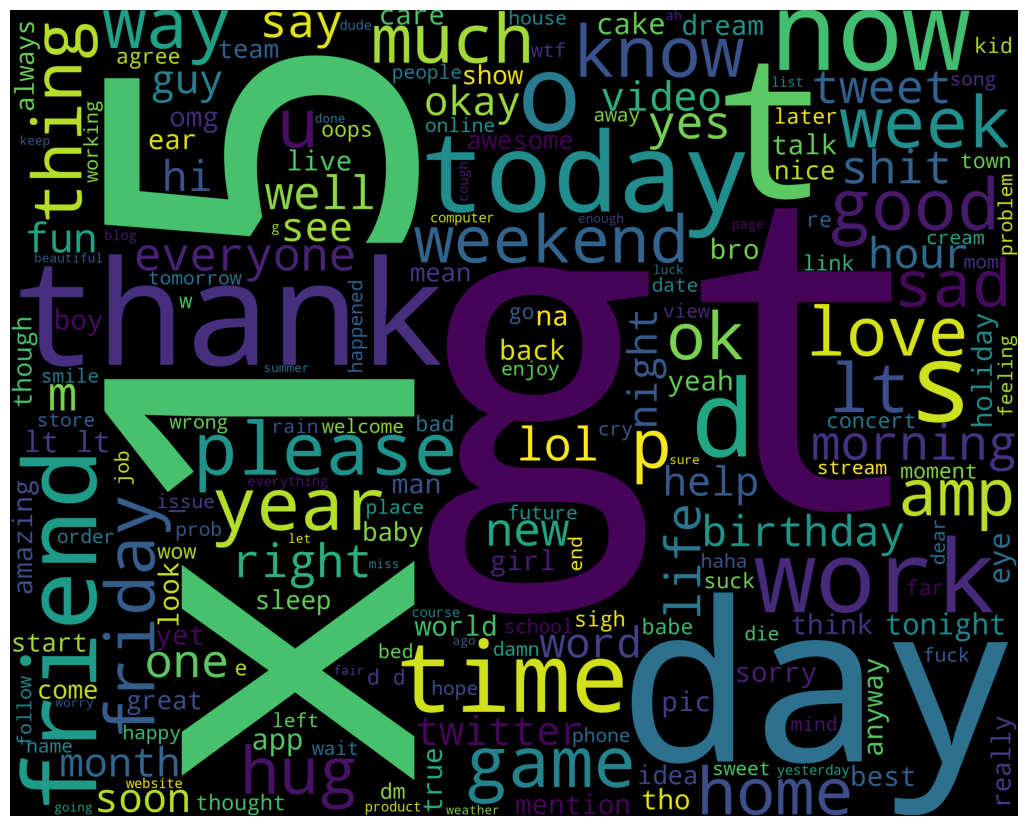

In [17]:
wordcloud_draw(w_features)

In [18]:
# Training the Naive Bayes classifier
training_set = nltk.classify.apply_features(extract_features,tweets)
classifier = nltk.NaiveBayesClassifier.train(training_set)

In [19]:
neg_cnt = 0
pos_cnt = 0
for obj in test_neg:
    res =  classifier.classify(extract_features(obj.split()))
    if(res == 0):
        neg_cnt = neg_cnt + 1
for obj in test_pos:
    res =  classifier.classify(extract_features(obj.split()))
    if(res == 1):
        pos_cnt = pos_cnt + 1

print('[Negative]: %s/%s '  % (len(test_neg),neg_cnt))
print('[Positive]: %s/%s '  % (len(test_pos),pos_cnt))

[Negative]: 535/449 
[Positive]: 465/322 


## Useful links to start NLP
<br>
https://realpython.com/python-nltk-sentiment-analysis/

In [20]:
# prompt: print confusion matrix

from sklearn.metrics import confusion_matrix

# Create lists to store true labels and predicted labels
true_labels = []
predicted_labels = []

for obj in test['Tweet']:
    true_labels.append(test.loc[test['Tweet'] == obj, 'Sentiment'].iloc[0])
    predicted_labels.append(classifier.classify(extract_features(obj.split())))

# Calculate and print the confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)
print("Confusion Matrix:")
print(cm)


Confusion Matrix:
[[449  86]
 [143 322]]


### Task

*Bartosz Grabek*, *Jędrzej Ruciński*, *Jerzy Kraszewski*

In [21]:
import nltk
from nltk.corpus import twitter_samples
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [ ]:
pd.DataFrame._append()

In [25]:
vectorizer = TfidfVectorizer(max_features=3000)
X_train = vectorizer.fit_transform(train['Tweet'])
X_test = vectorizer.transform(test['Tweet'])
y_train = train['Sentiment']
y_test = test['Sentiment']

# Function to train model and evaluate performance
def evaluate_model(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    return accuracy, precision, recall, f1

# Train and evaluate multiple models
models = {
    'Naive Bayes': MultinomialNB(),
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'SVM': SVC(),
    'Random Forest': RandomForestClassifier(n_estimators=100),
    'Neural Network': MLPClassifier(max_iter=500)
}

# Create a table to store performance metrics
performance_table = pd.DataFrame(columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

# Evaluate each model
for model_name, model in models.items():
    accuracy, precision, recall, f1 = evaluate_model(model, X_train, X_test, y_train, y_test)
    performance_table = performance_table._append({
        'Model': model_name,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1
    }, ignore_index=True)

# Display the performance table
performance_table.sort_values(by='F1 Score', ascending=False, inplace=True)
print(performance_table)

                 Model  Accuracy  Precision    Recall  F1 Score
2                  SVM     0.792   0.784922  0.761290  0.772926
0          Naive Bayes     0.786   0.775824  0.759140  0.767391
1  Logistic Regression     0.779   0.772321  0.744086  0.757941
4       Neural Network     0.747   0.722689  0.739785  0.731137
3        Random Forest     0.738   0.706721  0.746237  0.725941


In [28]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier

# Download the VADER lexicon
nltk.download('vader_lexicon')

# Function to apply VADER and get sentiment scores
def evaluate_vader(tweets, true_labels):
    vader = SentimentIntensityAnalyzer()
    predictions = []
    
    for tweet in tweets:
        score = vader.polarity_scores(tweet)
        if score['compound'] >= 0.05:
            predictions.append(1)  # Positive sentiment
        else:
            predictions.append(0)  # Negative sentiment
            
    accuracy = accuracy_score(true_labels, predictions)
    precision = precision_score(true_labels, predictions)
    recall = recall_score(true_labels, predictions)
    f1 = f1_score(true_labels, predictions)
    
    return accuracy, precision, recall, f1

# Add new models (KNN, Gradient Boosting, VADER)
models['KNN'] = KNeighborsClassifier(n_neighbors=5)
models['Gradient Boosting'] = GradientBoostingClassifier(n_estimators=100)

# Evaluate the VADER model
vader_accuracy, vader_precision, vader_recall, vader_f1 = evaluate_vader(test['Tweet'], y_test)
performance_table = performance_table._append({
    'Model': 'VADER',
    'Accuracy': vader_accuracy,
    'Precision': vader_precision,
    'Recall': vader_recall,
    'F1 Score': vader_f1
}, ignore_index=True)

# Evaluate new models and add their performance to the table
for model_name, model in models.items():
    accuracy, precision, recall, f1 = evaluate_model(model, X_train, X_test, y_train, y_test)
    performance_table = performance_table._append({
        'Model': model_name,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1
    }, ignore_index=True)

# Sort the table by F1 score for better comparison
performance_table.sort_values(by='F1 Score', ascending=False, inplace=True)
print(performance_table)

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\barto\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


                  Model  Accuracy  Precision    Recall  F1 Score
5                 VADER     0.847   0.789963  0.913978  0.847458
0                   SVM     0.792   0.784922  0.761290  0.772926
8                   SVM     0.792   0.784922  0.761290  0.772926
1           Naive Bayes     0.786   0.775824  0.759140  0.767391
6           Naive Bayes     0.786   0.775824  0.759140  0.767391
2   Logistic Regression     0.779   0.772321  0.744086  0.757941
7   Logistic Regression     0.779   0.772321  0.744086  0.757941
9         Random Forest     0.756   0.735608  0.741935  0.738758
3        Neural Network     0.747   0.722689  0.739785  0.731137
4         Random Forest     0.738   0.706721  0.746237  0.725941
10       Neural Network     0.744   0.724731  0.724731  0.724731
12    Gradient Boosting     0.725   0.730583  0.647312  0.686431
11                  KNN     0.591   0.536364  0.888172  0.668826


### End of Task

In [ ]:
#measure F1 score, and recall, and precision
#build other model, e.g. random forest for this task

In [ ]:
# prompt: measure F1 score, and recall, and precision

from sklearn.metrics import f1_score, recall_score, precision_score

# Calculate F1 score
f1 = f1_score(true_labels, predicted_labels, average='weighted')  # Use 'weighted' for multi-class problems
print("F1 Score:", f1)

# Calculate recall
recall = recall_score(true_labels, predicted_labels, average='weighted')
print("Recall:", recall)

# Calculate precision
precision = precision_score(true_labels, predicted_labels, average='weighted')
print("Precision:", precision)


F1 Score: 0.7399864551083591
Recall: 0.742
Precision: 0.7497358166567598


In [ ]:
# prompt: add another metric for assesing the model

from sklearn.metrics import accuracy_score

# Calculate accuracy
accuracy = accuracy_score(true_labels, predicted_labels)
print("Accuracy:", accuracy)


Accuracy: 0.742


In [ ]:
# prompt: based on tweets prepare training set, without nltk library

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, confusion_matrix

# Assuming 'train' and 'test' DataFrames are already defined with 'Tweet' and 'Sentiment' columns

# Prepare the training data
X_train = train['Tweet'].tolist()
y_train = train['Sentiment'].tolist()

# Prepare the test data
X_test = test['Tweet'].tolist()
y_test = test['Sentiment'].tolist()


# Create a CountVectorizer to convert text into numerical features
vectorizer = CountVectorizer(stop_words='english')  # Use stop words for better performance

# Fit and transform the training data
X_train_vectorized = vectorizer.fit_transform(X_train)

# Transform the test data (using the same vocabulary as the training data)
X_test_vectorized = vectorizer.transform(X_test)

# Train a Logistic Regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train_vectorized, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test_vectorized)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
precision = precision_score(y_test, y_pred, average='weighted')
cm = confusion_matrix(y_test, y_pred)

print("Accuracy:", accuracy)
print("F1 Score:", f1)
print("Recall:", recall)
print("Precision:", precision)
print("Confusion Matrix:\n", cm)


Accuracy: 0.752
F1 Score: 0.7515189406691354
Recall: 0.752
Precision: 0.7539667182662538
Confusion Matrix:
 [[398 102]
 [146 354]]


In [ ]:
# prompt: the same as above but with random forest

from sklearn.ensemble import RandomForestClassifier

# Assuming 'train' and 'test' DataFrames are already defined with 'Tweet' and 'Sentiment' columns

# Prepare the training data
X_train = train['Tweet'].tolist()
y_train = train['Sentiment'].tolist()

# Prepare the test data
X_test = test['Tweet'].tolist()
y_test = test['Sentiment'].tolist()


# Create a CountVectorizer to convert text into numerical features
vectorizer = CountVectorizer(stop_words='english')  # Use stop words for better performance

# Fit and transform the training data
X_train_vectorized = vectorizer.fit_transform(X_train)

# Transform the test data (using the same vocabulary as the training data)
X_test_vectorized = vectorizer.transform(X_test)

# Train a Random Forest model
model = RandomForestClassifier(max_depth=2, random_state=0)
model.fit(X_train_vectorized, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test_vectorized)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
precision = precision_score(y_test, y_pred, average='weighted')
cm = confusion_matrix(y_test, y_pred)

print("Accuracy:", accuracy)
print("F1 Score:", f1)
print("Recall:", recall)
print("Precision:", precision)
print("Confusion Matrix:\n", cm)


Accuracy: 0.665
F1 Score: 0.6506016431109595
Recall: 0.665
Precision: 0.6975659870396712
Confusion Matrix:
 [[434  66]
 [269 231]]


In [ ]:
# prompt: add sentiment analysis with Vader library

!pip install vaderSentiment

from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

analyzer = SentimentIntensityAnalyzer()

# Function to get sentiment scores
def get_sentiment_scores(text):
    return analyzer.polarity_scores(text)

# Apply sentiment analysis to the 'Tweet' column
train['Sentiment Scores'] = train['Tweet'].apply(get_sentiment_scores)

# Extract compound score (overall sentiment)
train['Compound Score'] = train['Sentiment Scores'].apply(lambda x: x['compound'])

# Assign sentiment labels based on compound score
train['Vader Sentiment'] = train['Compound Score'].apply(lambda x: 'Positive' if x >= 0.05 else ('Negative' if x <= -0.05 else 'Neutral'))


# Print the DataFrame with sentiment scores and labels
print(train[['Tweet', 'Sentiment Scores', 'Compound Score', 'Vader Sentiment']])

# You can now analyze the 'Vader Sentiment' column to see how the Vader library categorized the tweets.

# Example: Analyze the distribution of sentiment labels
print(train['Vader Sentiment'].value_counts())


                                                  Tweet  \
7049  @twentyonepilots @fujirock_jp tylers hipster g...   
7473                    @mussshiii @Takafofo so wat??:)   
444   I remember when Fab Four had a 24 hour call, D...   
1436             @Wilma2207fWilma haha! Thank you! :) 🍰   
7917  A perfect triangle will win the ball game. :) ...   
...                                                 ...   
9827  Stats for the week have arrived. 1 new followe...   
7311  @WizKhallista it's about the egg, water and bl...   
9227            is allergic to cats... itchy throat. :(   
9450             Now I'm sad :( https://t.co/Ribf3SkrDI   
8441           My body still hurts af. Just got home :)   

                                       Sentiment Scores  Compound Score  \
7049  {'neg': 0.0, 'neu': 0.554, 'pos': 0.446, 'comp...          0.6166   
7473  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...          0.0000   
444   {'neg': 0.319, 'neu': 0.554, 'pos': 0.128, 'co...         -0